In [1]:
import numpy as np
import pandas as pd
# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#read data
data = pd.read_csv('/Users/alhafeez/Documents/smt7/bengkod/uts/penguins_size.csv')

#tampilkan 10 data sample
data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
25,Adelie,Biscoe,35.3,18.9,187.0,3800.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,FEMALE
128,Adelie,Torgersen,39.0,17.1,191.0,3050.0,FEMALE
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,FEMALE
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
77,Adelie,Torgersen,37.2,19.4,184.0,3900.0,MALE
214,Chinstrap,Dream,45.7,17.0,195.0,3650.0,FEMALE
31,Adelie,Dream,37.2,18.1,178.0,3900.0,MALE
158,Chinstrap,Dream,46.1,18.2,178.0,3250.0,FEMALE


In [2]:
# cek dan tampilkan nilai kosong
print(data.isnull().sum().to_frame("Jumlah Nilai Kosong"))

# cek dan tampilkan data duplikat
print(f"Jumlah data duplikat: {data.duplicated().sum()}")
data[data.duplicated()]

# hapus nilai kosong dan duplikat
data = data.dropna().drop_duplicates()

                   Jumlah Nilai Kosong
species                              0
island                               0
culmen_length_mm                     2
culmen_depth_mm                      2
flipper_length_mm                    2
body_mass_g                          2
sex                                 10
Jumlah data duplikat: 0


In [3]:
# cek informasi setiap kolom
print(data.info())

# cek nilai unik pada kolom bertipe data object
for col in data.select_dtypes(include='object'):
    print(f"Nilai unik di kolom '{col}': {data[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB
None
Nilai unik di kolom 'species': ['Adelie' 'Chinstrap' 'Gentoo']
Nilai unik di kolom 'island': ['Torgersen' 'Biscoe' 'Dream']
Nilai unik di kolom 'sex': ['MALE' 'FEMALE' '.']


In [4]:
# hitung jumlah nilai dalam kolom sex
print(data['sex'].value_counts())

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


In [5]:
# hapus kolom 'sex' dengan nilai "."
data = data[data['sex'] != "."]

# Mengecek ulang jumlah nilai dalam kolom 'sex'
print(data['sex'].value_counts())

sex
MALE      168
FEMALE    165
Name: count, dtype: int64


In [6]:
# tampilkan semua nilai unik dari kolom 'species'
print(data['species'].unique())
# tampilkan semua nilai unik dari kolom 'island'
print(data['island'].unique())
# tampilkan semua nilai unik dari kolom 'sex'
print(data['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


In [7]:
# Membuat dictionary untuk species, island, dan sex
kamusSpesies = {str(TARGET): INDEX for INDEX, TARGET in enumerate(data['species'].unique())}
kamusIsland = {str(TARGET): INDEX for INDEX, TARGET in enumerate(data['island'].unique())}
kamusSex = {str(TARGET): INDEX for INDEX, TARGET in enumerate(data['sex'].unique())}

# Mapping dictionary yang telah dibuat ke dalam data frame
data['species'] = data['species'].map(kamusSpesies)
data['island'] = data['island'].map(kamusIsland)
data['sex'] = data['sex'].map(kamusSex)

# Menampilkan 5 data acak setelah proses pemetaan
print(data.sample(5))

     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
53         0       1              42.0             19.5              200.0   
123        0       0              41.4             18.5              202.0   
12         0       0              41.1             17.6              182.0   
331        2       1              49.8             15.9              229.0   
91         0       2              41.1             18.1              205.0   

     body_mass_g  sex  
53        4050.0    0  
123       3875.0    0  
12        3200.0    1  
331       5950.0    0  
91        4300.0    0  


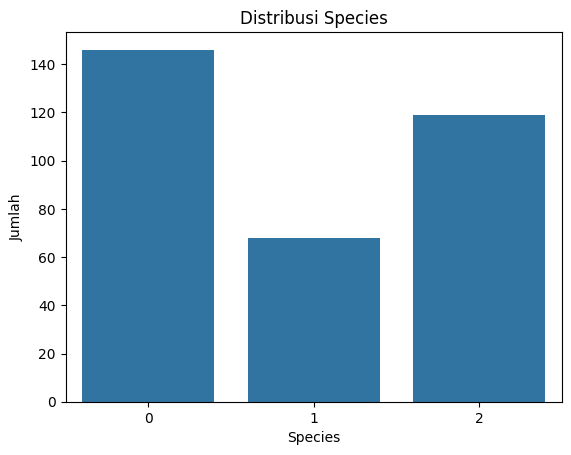

In [8]:
# buat bar plot untuk kolom 'species'
sns.countplot(data=data, x='species')
plt.title('Distribusi Species')
plt.xlabel('Species')
plt.ylabel('Jumlah')
plt.show()

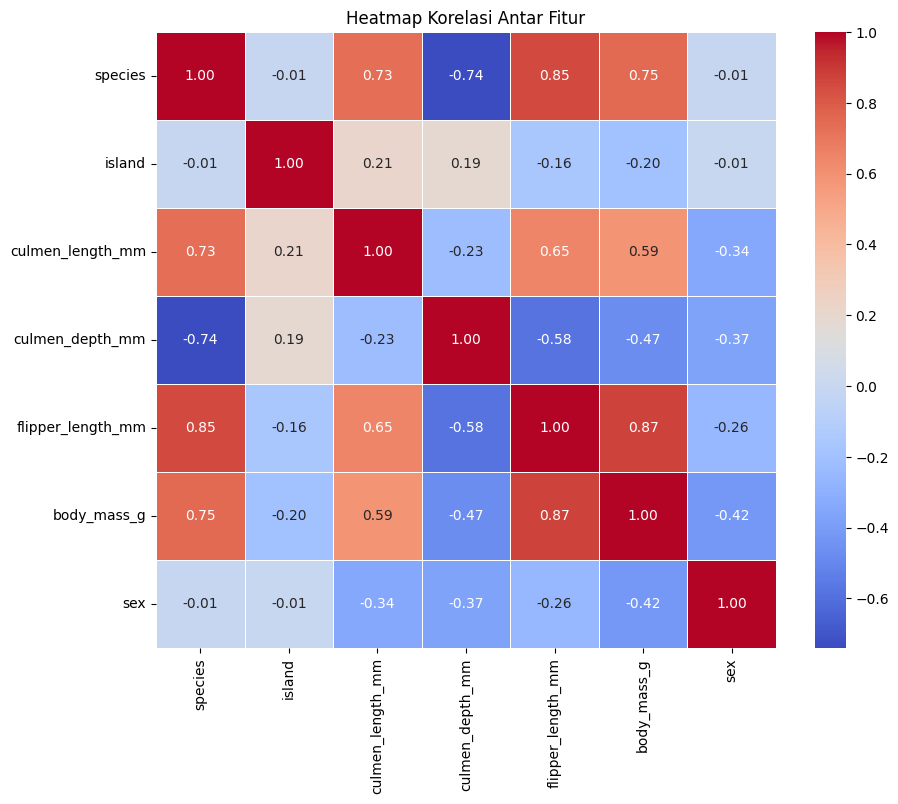

In [9]:
# Menghitung korelasi antar fitur
corr_matrix = data.corr()
# Membuat heatmap untuk korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [12]:
x = data.drop(columns='species')
y = data['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
# BELUM DI-NORMALISASI
from sklearn.metrics import accuracy_score

# Inisialisasi model
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
gaussian_nb = GaussianNB()

# Melatih dan mengevaluasi model KNN
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN: {accuracy_knn:.2f}")

# Melatih dan mengevaluasi model Decision Tree
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt:.2f}")

# Melatih dan mengevaluasi model Gaussian Naive Bayes
gaussian_nb.fit(x_train, y_train)
y_pred_gnb = gaussian_nb.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Akurasi Gaussian Naive Bayes: {accuracy_gnb:.2f}")

Akurasi KNN: 0.98
Akurasi Decision Tree: 0.98
Akurasi Gaussian Naive Bayes: 0.84


In [17]:
# SUDAH DI-NORMALISASI

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Inisialisasi model
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
gaussian_nb = GaussianNB()

# Melatih dan mengevaluasi model KNN
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN: {accuracy_knn:.2f}")

# Melatih dan mengevaluasi model Decision Tree
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt:.2f}")

# Melatih dan mengevaluasi model Gaussian Naive Bayes
gaussian_nb.fit(x_train, y_train)
y_pred_gnb = gaussian_nb.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Akurasi Gaussian Naive Bayes: {accuracy_gnb:.2f}")

Akurasi KNN: 0.98
Akurasi Decision Tree: 0.98
Akurasi Gaussian Naive Bayes: 0.84
